<a href="https://colab.research.google.com/github/Ashna23/Calculator/blob/master/ENDTERM_Report_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from random import random
from math import exp

data = pd.read_csv('/content/BankNote_Authentication.csv', header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class'] # Naming feature columns

print(data.head()) #Gives first 5 values

   variance  skewness  curtosis  entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


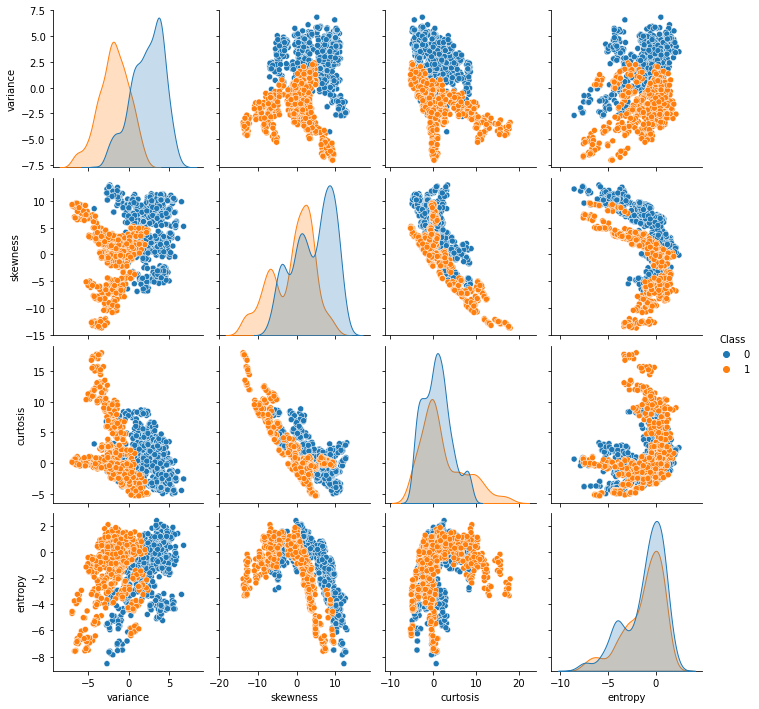

In [77]:
#Pair Plot
sns.pairplot(data,vars=data.columns[:-1],hue="Class")

plt.show()

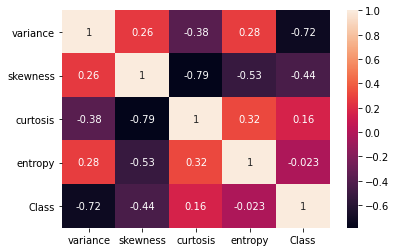

In [78]:
#Analyzing features correlation

sns.heatmap(data.corr(), annot=True)



In [79]:
#Statistical Analysis of dataset
'Gaussian-like distribution of variance and skewness and skewed gaussian distribution or exponential'
data.describe()


,variance,skewness,curtosis,entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


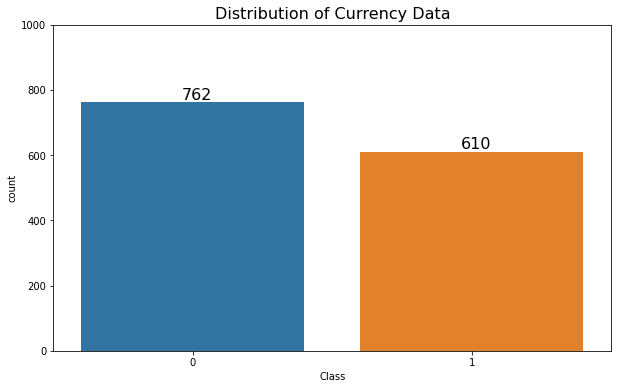

In [80]:
# checking the distribution of dataset
plt.figure(figsize=(10,6))
plt.title('Distribution of Currency Data', size=16)
sns.countplot(x=data['Class'])
class_count = data.Class.value_counts()
plt.annotate(s=class_count[0], xy=(-0.04,10+class_count[0]), size=16)
plt.annotate(s=class_count[1], xy=(0.96,10+class_count[1]), size=16)
plt.ylim(0,1000)
plt.show()

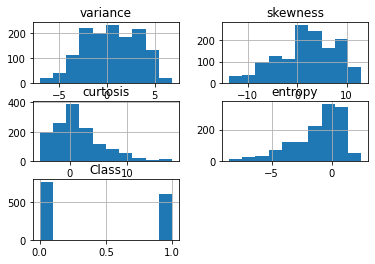

In [81]:
#Histogram Plot
data.hist()
pyplot.show()


<function matplotlib.pyplot.show>

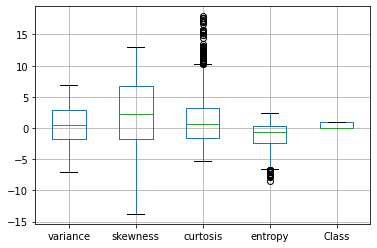

In [82]:
#Box Plot
data.boxplot()
plt.show

In [83]:
# For balancing the data, undersampling technique  is used
'''balance_data = class_count[0] - class_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='Class')
data = data[balance_data:]
print(data['Class'].value_counts())
'''

"balance_data = class_count[0] - class_count[1]\ndata = data.sample(frac=1, random_state=42).sort_values(by='Class')\ndata = data[balance_data:]\nprint(data['Class'].value_counts())\n"

# SPLITTING OF DATA INTO TEST AND TRAIN


In [84]:
#Test and Train splitting

x= data.loc[:,data.columns !='Class']
y=data.loc[:,data.columns=='Class']

x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)






# PCA


In [85]:
x= data.loc[:,data.columns !='Class']
y=data.loc[:,data.columns=='Class']

x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()  
x_train = standardScaler.fit_transform(x_train)  
x_test = standardScaler.transform(x_test)

pca=PCA()
x_train = pca.fit_transform(x_train)  
x_test = pca.transform(x_test)  

explained_variance = pca.explained_variance_ratio_
print(explained_variance)


[0.543217   0.32342965 0.08704387 0.04630949]


#**CLASSIFICATION** **ALGORITHMS**

# Gausian Naive Bayes


Training Set Accuracy:84.062
Testing Set Accuracy:83.252
Confusion Matrix:
 [[144  36]
 [ 33 199]]
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.80      0.81       180
           0       0.85      0.86      0.85       232

    accuracy                           0.83       412
   macro avg       0.83      0.83      0.83       412
weighted avg       0.83      0.83      0.83       412

Naive Bayes:AUROC=0.829


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


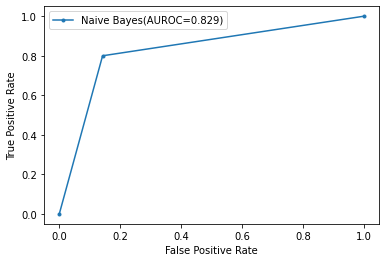

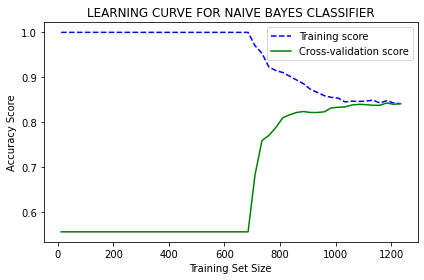

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import numpy as np
from sklearn.model_selection import learning_curve


x= data.loc[:,data.columns !='Class']
y=data.loc[:,data.columns=='Class']


x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
'''
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
'''
gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_predicted_train=gnb.predict(x_train)
y_predicted= gnb.predict(x_test)

accuracy_train=accuracy_score(y_train,y_predicted_train)*100
accuracy_test=accuracy_score(y_test,y_predicted)*100



print('Training Set Accuracy:%.3f'% accuracy_train)
print('Testing Set Accuracy:%.3f'% accuracy_test)


#confusion matrix
matrix=confusion_matrix(y_test,y_predicted,labels=[1,0])
print('Confusion Matrix:\n',matrix)
    
    
matrix=classification_report(y_test,y_predicted,labels=[1,0])
print('Classification Report:\n',matrix)

#ROC-AUC
auc=roc_auc_score(y_test,y_predicted)
print('Naive Bayes:AUROC=%.3f' %(auc))
    
fpr,tpr,_=roc_curve(y_test,y_predicted)
pyplot.plot(fpr,tpr,marker=".",label="Naive Bayes(AUROC=%.3f)"% auc)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()



#Plotting Learning Curve
sizes, training_scores, testing_scores = learning_curve(GaussianNB(), x, np.ravel(y), cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR NAIVE BAYES CLASSIFIER")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()



# KNN 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Testing Set Accuracy:100.000
Confusion Matrix:
 [[180   0]
 [  0 232]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           0       1.00      1.00      1.00       232

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

KNN:AUROC=1.000


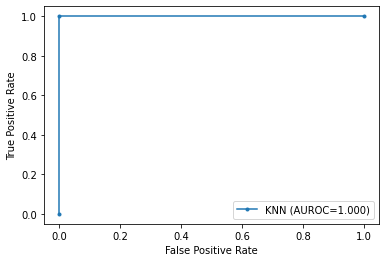

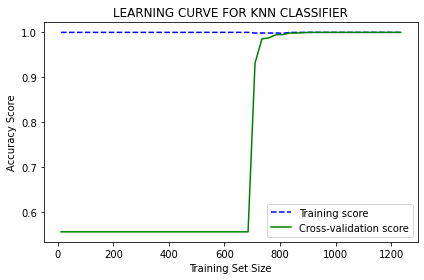

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import learning_curve

#Splitting
x= data.loc[:,data.columns !='Class']
y=data.loc[:,data.columns=='Class']


x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

'''
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
'''
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train, y_train)
y_result = knn.predict(x_test)

accuracy=accuracy_score(y_test,y_result)*100

print('Testing Set Accuracy:%.3f'% accuracy)


#confusion matrix
matrix=confusion_matrix(y_test,y_result,labels=[1,0])
print('Confusion Matrix:\n',matrix)
    
    
matrix=classification_report(y_test,y_result,labels=[1,0])
print('Classification Report:\n',matrix)


#ROC-AUC
auc=roc_auc_score(y_test,y_result)
print('KNN:AUROC=%.3f' %(auc))
    
fpr,tpr,_=roc_curve(y_test,y_result)
pyplot.plot(fpr,tpr,marker=".",label="KNN (AUROC=%.3f)"% auc)

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()



#Plotting Learning Curve
sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), x, np.ravel(y), cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR KNN CLASSIFIER")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Choosing K value

Text(0, 0.5, 'Error Rate')

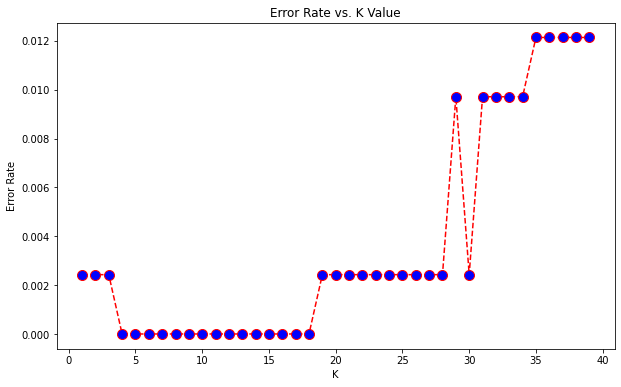

In [88]:
error_rate = []
  
# Will take some time
for i in range(1, 40):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,np.ravel( y_train))
    pred_i = knn.predict(x_test)
   
    error_rate.append(np.mean(np.ravel(pred_i) != np.ravel(y_test)))

#Plotting the Data
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='red',linestyle ='dashed', marker ='o',markerfacecolor ='blue', markersize = 10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# LOGISTIC REGRESSION

# SUPPORT VECTOR MACHINE (SVM)

# GRADIENT DESCENT NEURAL NETWORK MODEL-From Scratch



Forward Propagation

In [89]:
#Neural Network Model
# BackPropagation Model has been used 
'Initializing of Neural Network -3 layer neural network. 1st Input layer, 2nd Hidden Layer, 3rd Output layer '
' taking number of neurons in hidden layer=5'
'w1,b1- weights and bias for input layer'
'w2,b2 -weights and bias for hidden layer'

def parameters(n_inputs,n_hidden,n_outputs):
  W1 = np.random.randn(n_hidden, n_inputs)*0.01
  b1 = np.random.randn(n_hidden,1)
  W2 = np.random.randn(n_outputs, n_hidden)*0.01
  b2 = np.random.randn(n_outputs,1)
  return W1,b1,W2,b2


'Forward Propagation'
'The output from a neural network is calculated by propagating an input signal through each layer'

#Non-linearity Function (sigmoid)

def sigmoid(s,deriv=False):
  if (deriv==True):
    return s*(1-s)
  return 1.0/(1.0+np.exp(-s))

def forward_propagation(W1,b1,W2,b2,x_train):
  
 
  Z1=np.dot(W1,x_train)+b1
  A1=np.tanh(Z1)
  Z2=np.dot(W2,A1) + b2
  A2=sigmoid(Z2)
  
  return Z1,A1,Z2,A2

def cost_function(A2,actual_y):
  m=actual_y.size
  Loss=np.multiply(np.log(A2),actual_y)+np.multiply((1-actual_y),np.log(1-A2))
  cost=-np.sum(Loss)/m
  cost=np.squeeze(cost)
  return cost


Backward Propagation


In [90]:
def backward_propagation_error(W1,b1,W2,b2,Z1,A1,Z2,A2,x_train,actual_y,learning_rate):
  m=actual_y.size
  dZ2=A2-actual_y
  dW2=(1/m)*np.dot(dZ2,A1.T)
  db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)

  dZ1=np.multiply(np.dot(W2.T,dZ2),1-np.power(A1,2))
  dW1 = (1/m)*np.dot(dZ1,x_train.T)
  db1= (1/m)*np.sum(dZ1,axis=1,keepdims=True)

  W2 -= learning_rate * dW2
  b2 -= learning_rate * db2
  W1 -= learning_rate * dW1
  b1 -= learning_rate * db1

  return W1,b1,W2,b2


Training of Samples

In [91]:
from sklearn.metrics import accuracy_score
#Training of samples
def train_samples(W1,b1,W2,b2,x_train,y_train,learning_rate,epochs,n_outputs):
  for epoch in range(epochs):
    
    Z1,A1,Z2,A2=forward_propagation(W1,b1,W2,b2,x_train)
    actual_y=y_train 

    cost_error=cost_function(A2,actual_y)
    W1,b1,W2,b2=backward_propagation_error(W1,b1,W2,b2,Z1,A1,Z2,A2,x_train,actual_y,learning_rate)
    
    
    predicted_y=A2.T
   
    for i in range(len(predicted_y)):
      if (predicted_y[i])>0.5:
        predicted_y[i]=1
      else:
        predicted_y[i]=0
    
    accuracy=accuracy_score(actual_y.T,predicted_y)*100
   
    print('epoch:%d, error:%.3f, accuracy:%.3f'%(epoch,cost_error,accuracy))
    #print(W1,b1,W2,b2)
    
     

x_train=np.array(x_train).T
y_train=np.array(y_train).T
x_test=np.array(x_test).T
y_test=np.array(y_test).T

n_inputs=4
n_outputs=1
n_hidden=8
epochs=100
l_rate=0.1

'Parameters are defined'
W1,b1,W2,b2= parameters(n_inputs,n_hidden,n_outputs)
'Training of samples'
train_samples(W1,b1,W2,b2,x_train,y_train,l_rate,epochs,n_outputs)



epoch:0, error:0.690, accuracy:55.208
epoch:1, error:0.689, accuracy:55.208
epoch:2, error:0.688, accuracy:55.208
epoch:3, error:0.688, accuracy:55.208
epoch:4, error:0.687, accuracy:55.208
epoch:5, error:0.687, accuracy:55.208
epoch:6, error:0.686, accuracy:55.208
epoch:7, error:0.685, accuracy:55.208
epoch:8, error:0.684, accuracy:55.208
epoch:9, error:0.683, accuracy:55.208
epoch:10, error:0.682, accuracy:55.208
epoch:11, error:0.680, accuracy:55.208
epoch:12, error:0.678, accuracy:55.208
epoch:13, error:0.676, accuracy:55.208
epoch:14, error:0.673, accuracy:55.208
epoch:15, error:0.670, accuracy:55.208
epoch:16, error:0.667, accuracy:55.833
epoch:17, error:0.663, accuracy:57.083
epoch:18, error:0.659, accuracy:58.229
epoch:19, error:0.654, accuracy:60.938
epoch:20, error:0.649, accuracy:62.917
epoch:21, error:0.643, accuracy:64.792
epoch:22, error:0.636, accuracy:66.875
epoch:23, error:0.629, accuracy:67.708
epoch:24, error:0.621, accuracy:67.708
epoch:25, error:0.612, accuracy:68.

Testing of Samples

Accuracy:97.816
Loss 0.11461493146287942
Confusion Matrix:
 [[176   4]
 [  5 227]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.98      0.98       180
           0       0.98      0.98      0.98       232

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412

Neural Network:AUROC=0.978


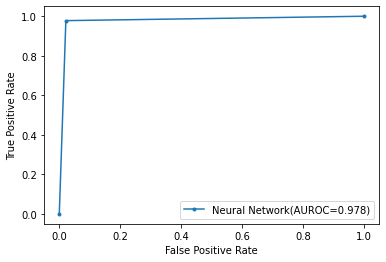

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

def test_samples(W1,b1,W2,b2,x_test,y_test,learning_rate,n_outputs):
    
    Z1,A1,Z2,A2=forward_propagation(W1,b1,W2,b2,x_test)
    actual_y=y_test
    cost_error=cost_function(A2,actual_y)
    predicted_y=A2.T
    'Threshold chosen =0.5'
    for i in range(0,len(predicted_y)):
      if (predicted_y[i])>0.5:
        predicted_y[i]=1
      else:
        predicted_y[i]=0
    
    accuracy=accuracy_score(y_test.T,predicted_y)*100

    print('Accuracy:%.3f'% accuracy)
    print('Loss',cost_error)

    #confusion matrix
    matrix=confusion_matrix(y_test.T,predicted_y,labels=[1,0])
    print('Confusion Matrix:\n',matrix)
    
    
    matrix=classification_report(y_test.T,predicted_y,labels=[1,0])
    print('Classification Report:\n',matrix)

    #ROC-AUC
    auc=roc_auc_score(y_test.T,predicted_y)
    print('Neural Network:AUROC=%.3f' %(auc))
    
    fpr,tpr,_=roc_curve(y_test.T,predicted_y)
    plt.plot(fpr,tpr,marker=".",label="Neural Network(AUROC=%.3f)"% auc)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()

    
'Parameters are defined'
W1=np.array([[-0.55965035, -0.32136926, -0.36274862 ,-0.11455009],
 [ 0.43545818 , 0.23149047 , 0.24843042 , 0.10065319],
 [-0.07448807 ,-0.08373353 , 0.05269284, -0.01425215],
 [ 0.16406835 , 0.13819203 ,-0.08853311, -0.01112597],
 [-0.4416525 , -0.2505783 , -0.27931677, -0.08666078]])
W2= np.array([[ 1.294016 ,  -0.82483525,  0.02492986 ,-0.17421227  ,0.89108057]] )
b1= np.array([[ 0.36854255],
 [-0.17119923],
 [-1.64615044],
 [ 1.24644269],
 [ 0.32735663]])
b2=np.array([[0.24520326]])

'Tp rate= Recall= sensitivity= tp/tp+fn'
'tn rate =specificity=tn/tn+fp ,precision= tp/tp+fp '

'Testing of samples'
test_samples(W1,b1,W2,b2,x_test,y_test,l_rate,n_outputs)




# Neural Network using ADAM Optimizer

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import train_test_split

from random import random
from math import exp

data = pd.read_csv('/content/BankNote_Authentication.csv', header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class'] # Naming feature columns



#Test and Train splitting

x= data.loc[:,data.columns !='Class']
y=data.loc[:,data.columns=='Class']

x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
'''
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
'''



'\nsc = StandardScaler()\nx_train = sc.fit_transform(x_train)\nx_test = sc.transform(x_test)\n'

13/13 [==============================] - 0s 1ms/step - loss: 0.0065


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:100.000
Loss:0.00649
Confusion Matrix:
 [[180   0]
 [  0 232]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       180
           0       1.00      1.00      1.00       232

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412

Neural Network:AUROC=1.000


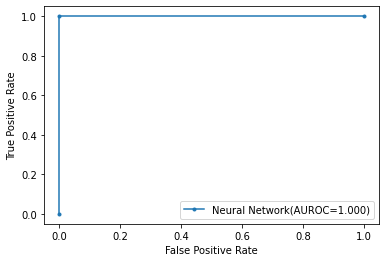

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score,roc_curve

n_inputs=x.shape[1]

#Neural Network Model

NN=Sequential()
NN.add(Dense(5,activation='relu',kernel_initializer='he_normal',input_shape=(n_inputs,)))
NN.add(Dense(1,activation="sigmoid"))
NN.compile(optimizer='adam',loss='binary_crossentropy')

#Model fitting
test_model=NN.fit(x_train,y_train,epochs=100,batch_size=20 ,verbose=0,validation_data=(x_test,y_test))
predicted_y=NN.predict_classes(x_test)

#Accuracy of test data
accuracy=accuracy_score(y_test,predicted_y)*100

#Loss 
loss=NN.evaluate(x_test,y_test)

print('Accuracy:%.3f'% accuracy)
print('Loss:%.5f'% loss)

#confusion matrix
matrix=confusion_matrix(y_test,predicted_y,labels=[1,0])
print('Confusion Matrix:\n',matrix)
    
    
matrix=classification_report(y_test,predicted_y,labels=[1,0])
print('Classification Report:\n',matrix)

#ROC Curve:
auc=roc_auc_score(y_test,predicted_y)
print('Neural Network:AUROC=%.3f' %(auc))
    
fpr,tpr,_=roc_curve(y_test,predicted_y)
plt.plot(fpr,tpr,marker=".",label="Neural Network(AUROC=%.3f)"% auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


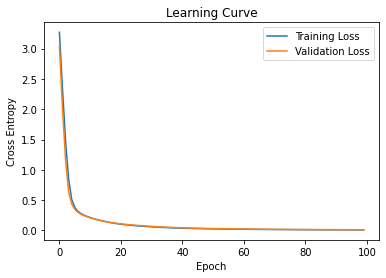

In [95]:
'plotting learning curves'

pyplot.title('Learning Curve')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(test_model.history['loss'],label='Training Loss')
pyplot.plot(test_model.history['val_loss'],label='Validation Loss')
pyplot.legend()
pyplot.show()

# DECISION TREES-CART ANALYSIS

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split



data = pd.read_csv('/content/BankNote_Authentication.csv', header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class']


In [104]:
x = data.drop('Class', axis=1)
y = data['Class']

x_train , x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
'''
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
'''

Train Accuracy:99.062
Test Accuracy:97.573
Confusion Matrix:
 [[174   6]
 [  4 228]]
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.97      0.97       180
           0       0.97      0.98      0.98       232

    accuracy                           0.98       412
   macro avg       0.98      0.97      0.98       412
weighted avg       0.98      0.98      0.98       412

Decision Trees:AUROC=0.975


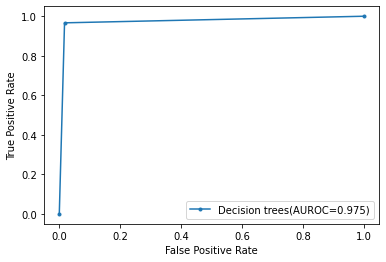

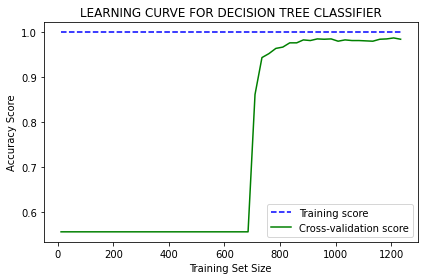

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import learning_curve

classifier = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.005)
classifier.fit(x_train, y_train)
y_predicted = classifier.predict(x_test)

#Accuracy of data
acc_train=classifier.score(x_train,y_train)*100
accuracy=accuracy_score(y_test,y_predicted)*100
print('Train Accuracy:%.3f'% acc_train)
print('Test Accuracy:%.3f'% accuracy)

#confusion matrix
matrix=confusion_matrix(y_test,y_predicted,labels=[1,0])
print('Confusion Matrix:\n',matrix)
    
    
matrix=classification_report(y_test,y_predicted,labels=[1,0])
print('Classification Report:\n',matrix)

#ROC-AUC
auc=roc_auc_score(y_test,y_predicted)
print('Decision Trees:AUROC=%.3f' % auc)

fpr,tpr,_=roc_curve(y_test,y_predicted)
plt.plot(fpr,tpr,marker=".",label="Decision trees(AUROC=%.3f)"% auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Plotting Learning Curve
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(), x, np.ravel(y), cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

plt.ylim()
  
# Drawing plot
plt.title("LEARNING CURVE FOR DECISION TREE CLASSIFIER")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


['variance', 'skewness', 'curtosis', 'entropy']
['0', '1']


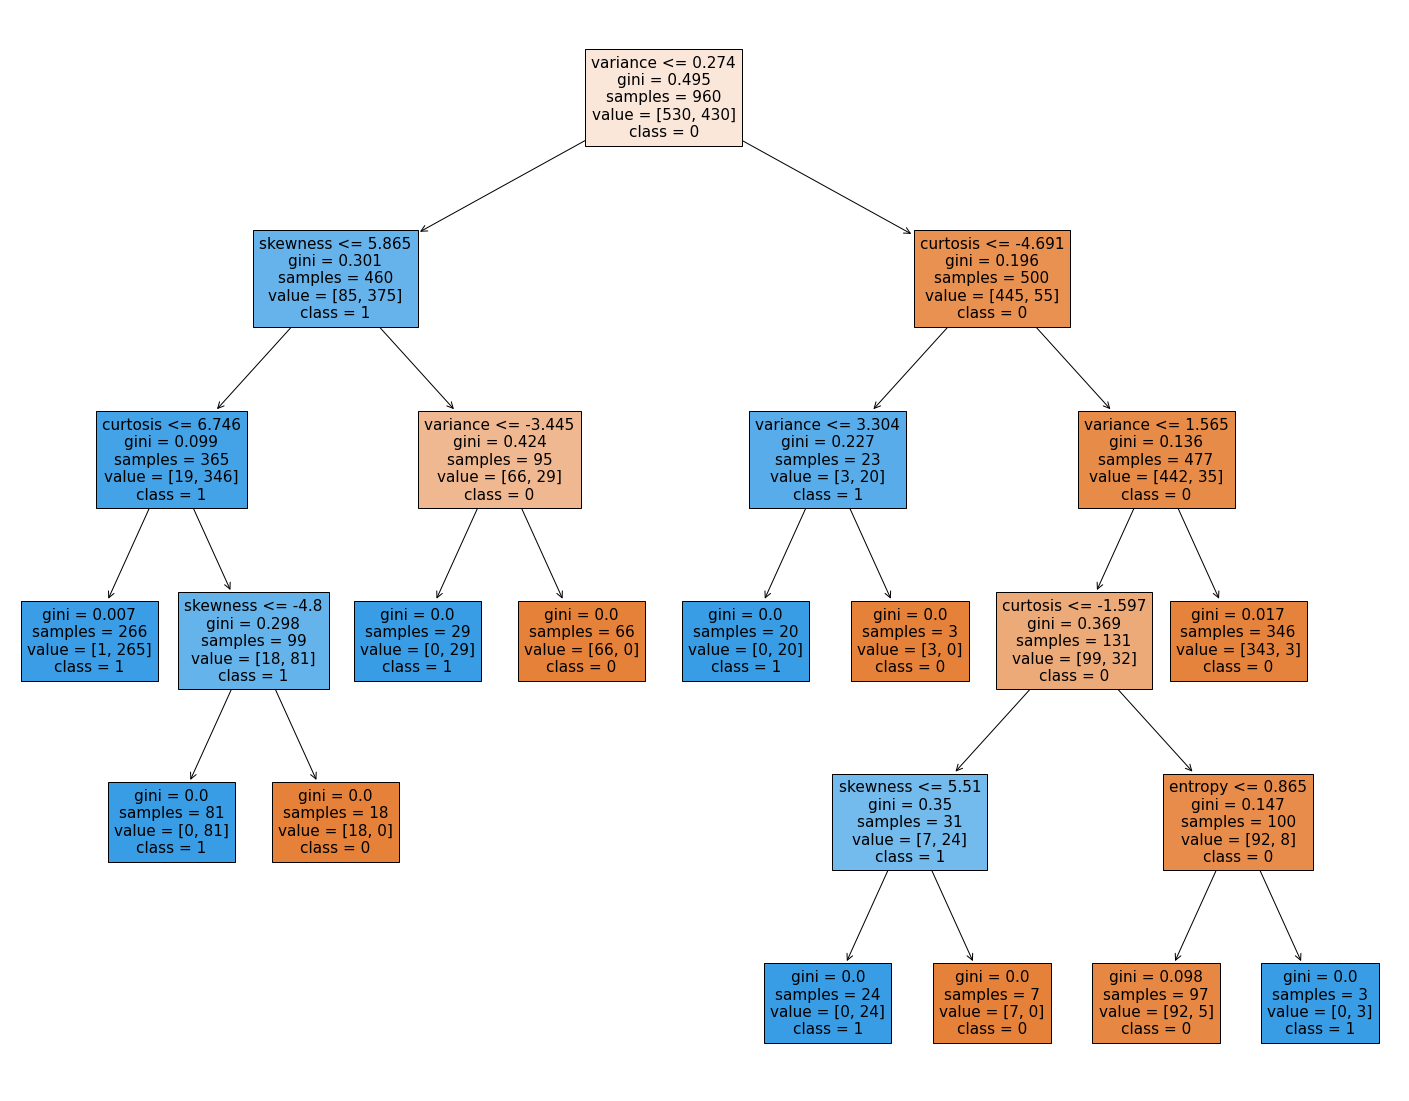

In [99]:
from sklearn import tree
from sklearn.tree import plot_tree
data_feature_names = list(x.columns)
print(data_feature_names)
data_target_names = [str(s) for s in y.unique()]
print(data_target_names)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,  feature_names=data_feature_names, class_names=data_target_names, filled=True)

fig.savefig("decistion_tree.png")







**Post -Pruning of tree**


Changing the max-depth of tree

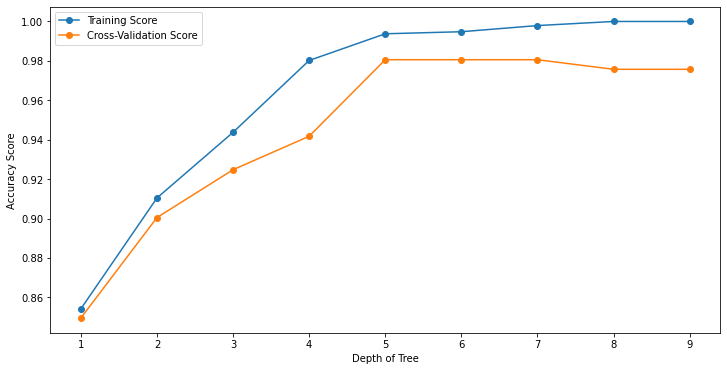

In [100]:
train_accuracy=[]
test_accuracy=[]

for depth in range(1,10):
  dt=DecisionTreeClassifier(max_depth=depth)
  dt.fit(x_train,y_train)
  train_accuracy.append(dt.score(x_train,y_train))
  test_accuracy.append(dt.score(x_test,y_test))

frame=pd.DataFrame({'Max_Depth':range(1,10),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
plt.figure(figsize=(12,6))
plt.plot(frame['Max_Depth'],frame['train_accuracy'],marker='o',label='Training Score')
plt.plot(frame['Max_Depth'],frame['test_accuracy'],marker='o',label='Cross-Validation Score')
plt.xlabel('Depth of Tree')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

Cost Complexity Pruning

[0.         0.00102881 0.00103775 0.0015625  0.00192308 0.00231665
 0.00294952 0.00543478 0.00545361 0.01129032 0.01737346 0.01772366
 0.028978   0.04197368 0.0648649  0.24823407]
Number of nodes in the last tree is: 1 with ccp_alpha: 0.2482340730676329


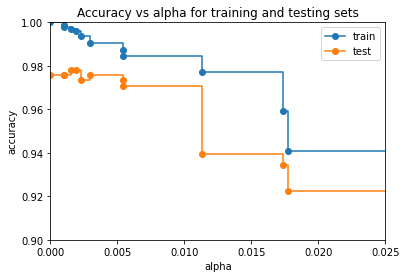

In [101]:
path = classifier.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.xlim(0,0.25*0.1)
plt.ylim(0.9,1.0)
plt.show()

# RANDOM FOREST


Train Accuracy:100.000
Test Accuracy:98.786
Confusion Matrix:
 [[178   2]
 [  3 229]]
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.99      0.99       180
           0       0.99      0.99      0.99       232

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

Decision Trees:AUROC=0.988


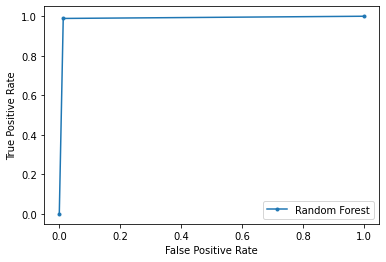

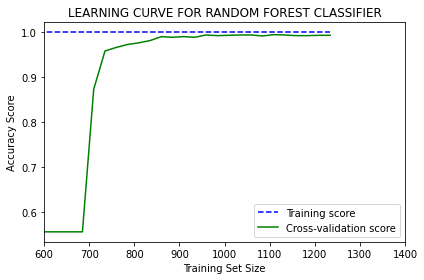

In [65]:
from sklearn.ensemble import RandomForestClassifier 


rfc = RandomForestClassifier(n_estimators=20, random_state=0) 

rfc.fit(x_train, y_train) 
y_predicted = rfc.predict(x_test)

#Accuracy of test data
Test_accuracy=accuracy_score(y_test,y_predicted)*100
Train_acc=rfc.score(x_train,y_train)*100
print('Train Accuracy:%.3f'% Train_acc)
print('Test Accuracy:%.3f'% Test_accuracy)

#confusion matrix
matrix=confusion_matrix(y_test,y_predicted,labels=[1,0])
print('Confusion Matrix:\n',matrix)
    
    
matrix=classification_report(y_test,y_predicted,labels=[1,0])
print('Classification Report:\n',matrix)

#ROC-AUC
auc=roc_auc_score(y_test,y_predicted)
print('Decision Trees:AUROC=%.3f' %(auc))

fpr,tpr,_=roc_curve(y_test,y_predicted)
plt.plot(fpr,tpr,marker=".",label="Random Forest")

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Plotting Learning Curve
sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(), x, np.ravel(y), cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))
  
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR RANDOM FOREST CLASSIFIER")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.xlim(600,1400)
plt.tight_layout()
plt.show()


Estimating n_estimators 

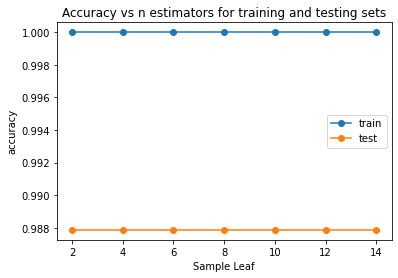

In [66]:
n_est=[2,4,6,8,10,12,14]
m = []
for i in n_est:
    rfc = RandomForestClassifier(min_samples_split=i,random_state=0)
    rfc.fit(x_train, y_train)
    m.append(rfc)


train_scores = [rfc.score(x_train, y_train) for i in n_est]
test_scores = [rfc.score(x_test, y_test) for i in n_est]

fig, ax = plt.subplots()
ax.set_xlabel("Sample Leaf")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs n estimators for training and testing sets")
ax.plot(n_est, train_scores, marker='o', label="train")
ax.plot(n_est, test_scores, marker='o', label="test")
ax.legend()

# **CLUSTERING ALGORITHMS**

# K-Means Clustering


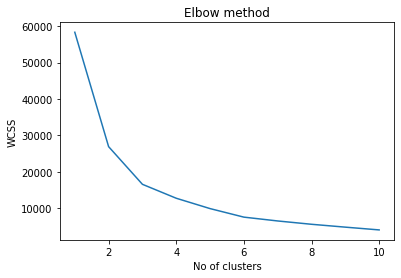

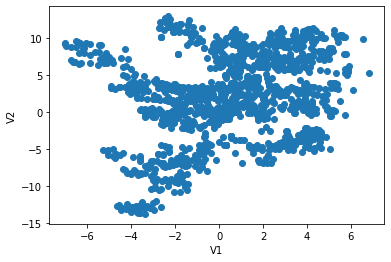

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from plotnine import ggplot, aes, geom_point

from sklearn.preprocessing import MinMaxScaler,StandardScaler

data = pd.read_csv('/content/BankNote_Authentication.csv', header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class']


#Taking Variance and skewness as two features for plotting the clustering

'Variance'
V1 = data['variance']

'Skewness'
V2= data['skewness']
y=data['Class']

result=np.column_stack((V1,V2))
#Using Elbow method to see number of clusters
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(result)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

plt.scatter(V1,V2)
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

centriods: [[-0.19838275 -3.68774038]
 [ 0.88705643  5.94561166]]


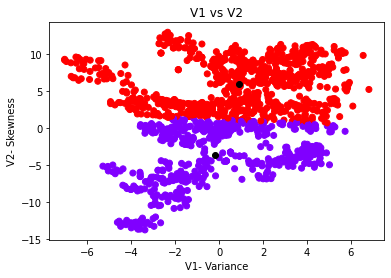

[[  0 574]
 [  1 798]]


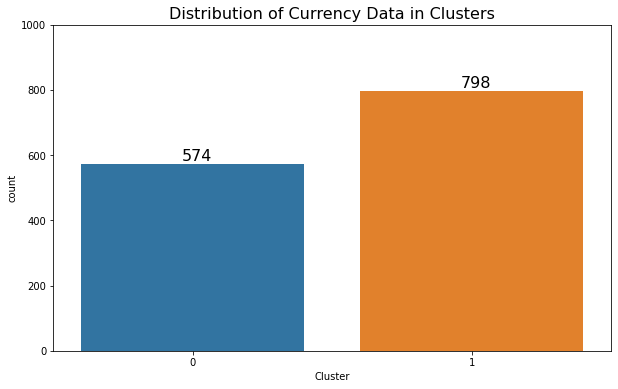

Silhouette Score: 0.43467447531593173


In [68]:
kmeans=KMeans(n_clusters=2)
#Predicted class
k_result=kmeans.fit_predict(result)
clusters=kmeans.cluster_centers_
print('centriods:',clusters)
plt.scatter(V1, V2, c=k_result,cmap='rainbow')
plt.scatter(clusters[:,0],clusters[:,1],color='black')
plt.title('V1 vs V2')
plt.xlabel('V1- Variance')
plt.ylabel('V2- Skewness')
plt.show()



# checking the distribution of clusters
plt.figure(figsize=(10,6))
plt.title('Distribution of Currency Data in Clusters', size=16)
sns.countplot(x=k_result)
unique, counts=np.unique(k_result,return_counts=True)
print(np.column_stack((unique,counts)))
class_count = counts
plt.annotate(s=class_count[0], xy=(-0.04,10+class_count[0]), size=16)
plt.annotate(s=class_count[1], xy=(0.96,10+class_count[1]), size=16)
plt.ylim(0,1000)
plt.xlabel('Cluster')
plt.show()

print('Silhouette Score:',silhouette_score(result,k_result))

After Normalization

centroids: [[ 0.65722693  0.48757905]
 [-0.84814093 -0.62921303]]


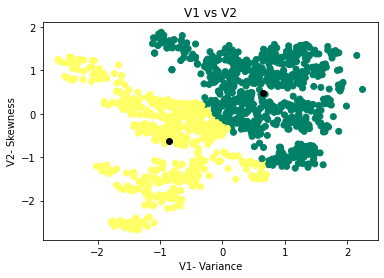

[[  0 774]
 [  1 598]]


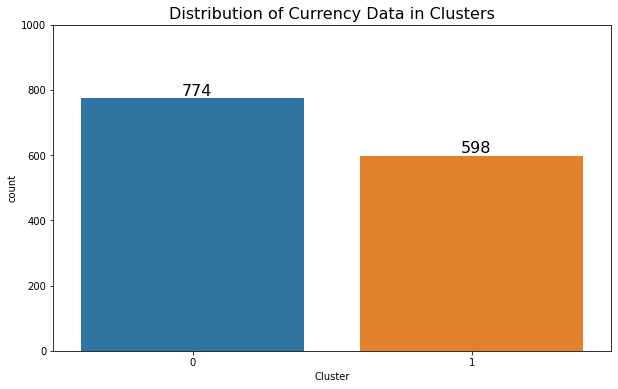

In [69]:
# define standard scaler
scaler = StandardScaler()
# transform data
data=scaler.fit_transform(data)

V1_n= data[:,0]
V2_n=data[:,1]

result=np.column_stack((V1_n,V2_n))
kmeans=KMeans(n_clusters=2)
k_resultn=kmeans.fit_predict(result)
clusters=kmeans.cluster_centers_
print('centroids:',clusters)

plt.scatter(V1_n, V2_n,c=k_resultn,cmap='summer', )
plt.scatter(clusters[:,0],clusters[:,1],color='black')
plt.title('V1 vs V2')
plt.xlabel('V1- Variance')
plt.ylabel('V2- Skewness')
plt.show()



# checking the distribution of clusters
plt.figure(figsize=(10,6))
plt.title('Distribution of Currency Data in Clusters', size=16)
sns.countplot(x=k_resultn)
unique, counts=np.unique(k_resultn,return_counts=True)
print(np.column_stack((unique,counts)))

class_count = counts
plt.annotate(s=class_count[0], xy=(-0.04,10+class_count[0]), size=16 )
plt.annotate(s=class_count[1], xy=(0.96,10+class_count[1]), size=16)
plt.ylim(0,1000)
plt.xlabel('Cluster')
plt.show()


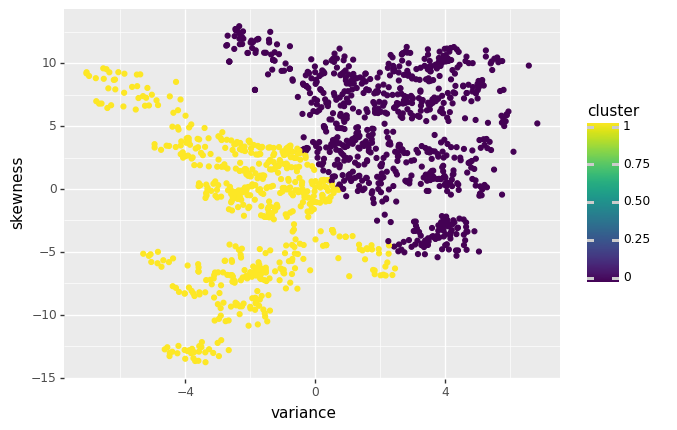

<ggplot: (8779277226317)>

In [70]:
x['cluster']=k_resultn
(ggplot(x,aes(x='variance',y='skewness',color="cluster"))+geom_point())

In [71]:
print('Silhouette Score:',silhouette_score(result,k_resultn))

Silhouette Score: 0.389927738770962


# Gaussian Mixture-EM

In [72]:
from sklearn.mixture import GaussianMixture
data = pd.read_csv('/content/BankNote_Authentication.csv', header=None)
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'Class']

features=['variance','skewness']

x= data[features]

scaler = StandardScaler()
x[features] =scaler.fit_transform(x)

gmm= GaussianMixture(n_components=2)

gmm.fit(x)
#This gives hard classification
cluster=gmm.predict(x)

#This gives probability of each point for both the clusters

cluster_prob=gmm.predict_proba(x)

print(cluster_prob)



[[1.85391638e-03 9.98146084e-01]
 [4.39388341e-04 9.99560612e-01]
 [4.84902564e-03 9.95150974e-01]
 ...
 [9.99821883e-01 1.78117286e-04]
 [9.98317942e-01 1.68205783e-03]
 [9.58037530e-01 4.19624700e-02]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [73]:
print('Silhouette Score:',silhouette_score(x,cluster))

Silhouette Score: 0.376667584809205


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


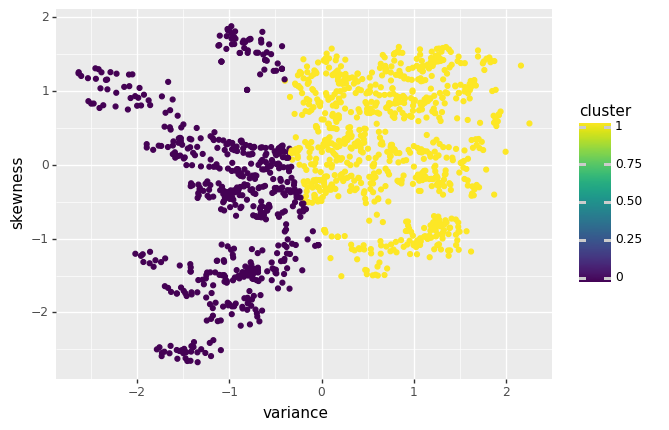

<ggplot: (8779277119817)>

In [74]:
x['cluster']=cluster


(ggplot(x,aes(x="variance",y="skewness",color="cluster"))+geom_point())


[[  0 774]
 [  1 598]]


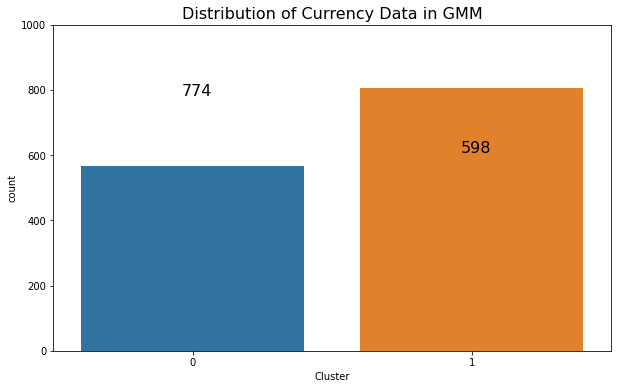

In [107]:
# checking the distribution of clusters
plt.figure(figsize=(10,6))
plt.title('Distribution of Currency Data in GMM', size=16)
sns.countplot(x=cluster)
unique, counts=np.unique(k_resultn,return_counts=True)
class_count = counts
print(np.column_stack((unique,counts)))
plt.annotate(s=class_count[0], xy=(-0.04,10+class_count[0]), size=16)
plt.annotate(s=class_count[1], xy=(0.96,10+class_count[1]), size=16)
plt.ylim(0,1000)
plt.xlabel('Cluster')
plt.show()